# Ramen Ratings
Tidy Tuesday challenge from https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-06-04

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set working directory to highest level of repo
os.chdir("..")
print(os.getcwd())

C:\Users\tom.pinckney\Documents\tidy-tuesday\ramen-ratings


In [3]:
# Read in and view data
ratings = pd.read_csv('data/ramen-ratings.csv')

ratings.head()

,review_number,brand,variety,style,country,stars
0,3180.0,Yum Yum,Tem Tem Tom Yum Moo Deng,Cup,Thailand,3.75
1,3179.0,Nagatanien,tom Yum Kung Rice Vermicelli,Pack,Japan,2.00
2,3178.0,Acecook,Kelp Broth Shio Ramen,Cup,Japan,2.50
3,3177.0,Maison de Coree,Ramen Gout Coco Poulet,Cup,France,3.75
4,3176.0,Maruchan,Gotsumori Shio Yakisoba,Tray,Japan,5.00


In [4]:
# Quick description of columns
ratings.describe(include = 'all')

,review_number,brand,variety,style,country,stars
count,3179.000000,3180,3180,3178,3180,3166.000000
unique,NaN,456,2971,8,44,NaN
top,NaN,Nissin,Chicken,Pack,Japan,NaN
freq,NaN,443,7,1832,532,NaN
mean,1590.057880,NaN,NaN,NaN,NaN,3.688298
std,917.938595,NaN,NaN,NaN,NaN,1.028214
min,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,795.500000,NaN,NaN,NaN,NaN,3.250000
50%,1590.000000,NaN,NaN,NaN,NaN,3.750000
75%,2384.500000,NaN,NaN,NaN,NaN,4.500000


## Visual Exploration

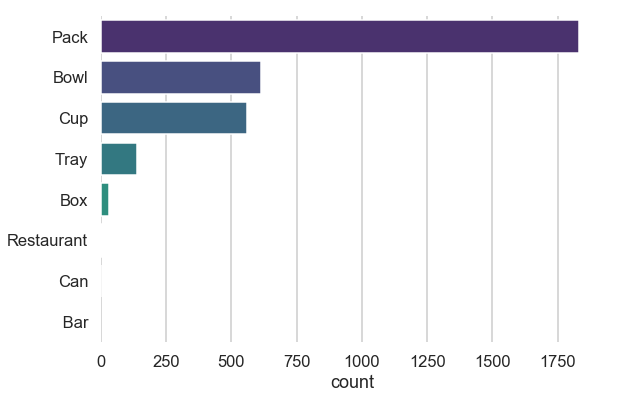

In [42]:
# What are the most popular styles
sns.set(context = 'talk',
        style = 'whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.countplot(y = 'style',
              order = ['Pack', 'Bowl', 'Cup', 'Tray', 'Box', 'Restaurant', 'Can',' Bar'],
              data = ratings,
              palette = ('viridis'))
ax.set(ylabel = '')
sns.despine(left=True, bottom=True)

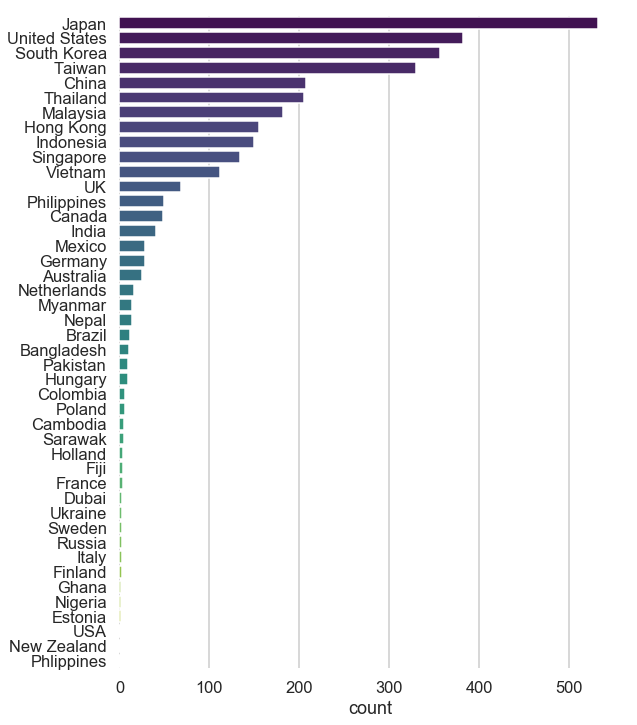

In [41]:
# What countries make the most ramen
sns.set(context = 'talk',
        style = 'whitegrid')
f, ax = plt.subplots(figsize=(9, 12))
sns.countplot(y = 'country',
              order = ratings['country'].value_counts().index,
              data = ratings,
              palette=('viridis'))
ax.set(ylabel = '')
sns.despine(left=True, bottom=True)

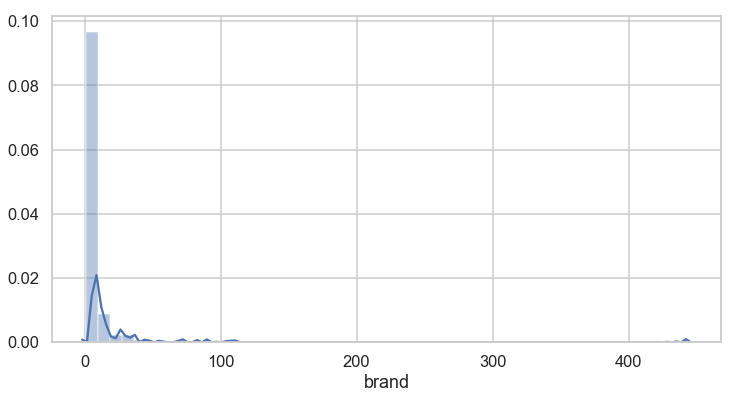

In [96]:
# Distribution of brands
f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(ratings['brand'].value_counts())

[Text(0,0.5,'')]

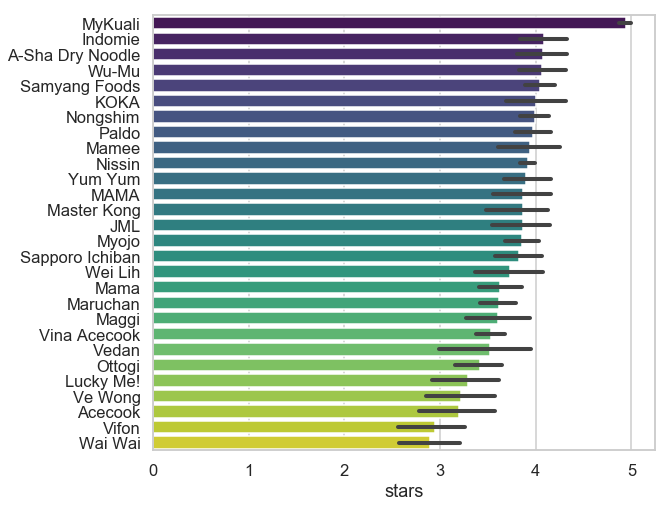

In [150]:
# What brands have the highest ratings

# brands must have at least 20 Reviews
top_brands = ratings['brand'].value_counts()[ratings['brand'].value_counts() > 20].index

ratings_common_brands = ratings.loc[ratings['brand'].isin(top_brands)]

f, ax = plt.subplots(figsize=(9, 8))
sns.barplot(y = 'brand', x = 'stars', data = ratings_common_brands,
           palette = ('viridis'),
           order = ratings_common_brands.groupby('brand')['stars'].mean().sort_values(ascending = False).index)
ax.set(ylabel = '')

[Text(0,0.5,'')]

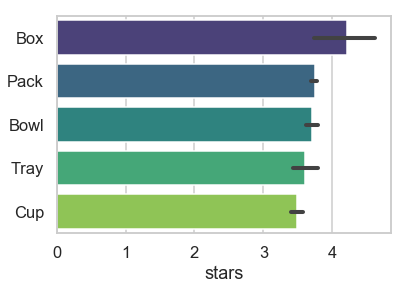

In [74]:
# What styles have the highest ratings

# Remove groups with fewer than 30 rows
ratings_common_styles = ratings.loc[~ratings['style'].isin(['Bar', 'Can', 'Restaurant'])]

f, ax = plt.subplots(figsize=(6, 4))
sns.barplot(y = 'style', x = 'stars', data = ratings_common_styles,
           palette = ('viridis'),
           order = ratings_common_styles.groupby('style')['stars'].mean().sort_values(ascending = False).index)
ax.set(ylabel = '')

[Text(0,0.5,'')]

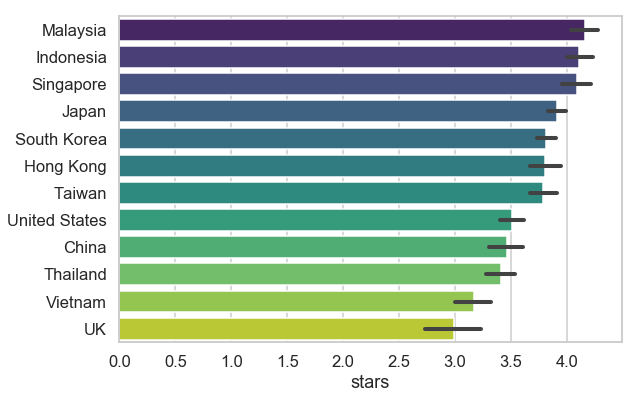

In [90]:
# What countries have the best Ramen

# Countries must have at least 50 rows
top_countries = ratings['country'].value_counts()[ratings['country'].value_counts() > 50].index

ratings_common_country = ratings.loc[ratings['country'].isin(top_countries)]

f, ax = plt.subplots(figsize=(9, 6))
sns.barplot(y = 'country', x = 'stars', data = ratings_common_country,
           palette = ('viridis'),
           order = ratings_common_country.groupby('country')['stars'].mean().sort_values(ascending = False).index)
ax.set(ylabel = '')

In [114]:
# Dive into best brand
best_brand = ratings.loc[ratings['brand'] == 'MyKuali']

# What are their best styles
best_brand.groupby('style').agg({'review_number':'count',
                                 'stars':'mean'})


,review_number,stars
style,,
Bowl,4,4.937500
Box,3,5.000000
Cup,3,4.916667
Pack,19,4.947368
